In [1]:
import pandas as pd

# Read in dataset
file = '/Users/bryantheil/Downloads/customers_dataset.csv'
df = pd.read_csv(file)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [2]:
# check for empty rows
sumofnull = df.isnull().sum()
sumofnull

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
# examine data types
print("Dataset datatypes:", df.dtypes)
print("*"*80)
print("Data description", df.describe())
print("*"*80)
print("Data shape", df.shape)

Dataset datatypes: age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object
********************************************************************************
Data description                 age           day           dur     num_calls
count  45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210     15.806419    258.163080      2.763841
std       10.618762      8.322476    257.527812      3.098021
min       18.000000      1.000000      0.000000      1.000000
25%       33.000000      8.000000    103.000000      1.000000
50%       39.000000     16.000000    180.000000      2.000000
75%       48.000000     21.000000    319.000000      3.000000
max       95.000000     31.000000   4918.000000     63.000000
************************************

In [7]:
# analyzing target distribution
distribute = df['y'].value_counts()
distribute

y
no     39922
yes     5289
Name: count, dtype: int64

In [12]:
# check duplicates
duplicates = df[df.duplicated()]

# drop duplicate data
df = df.drop_duplicates()

# check shape
print("Shape of dataset after dropping duplicates:", df.shape)

Shape of dataset after dropping duplicates: (45205, 11)


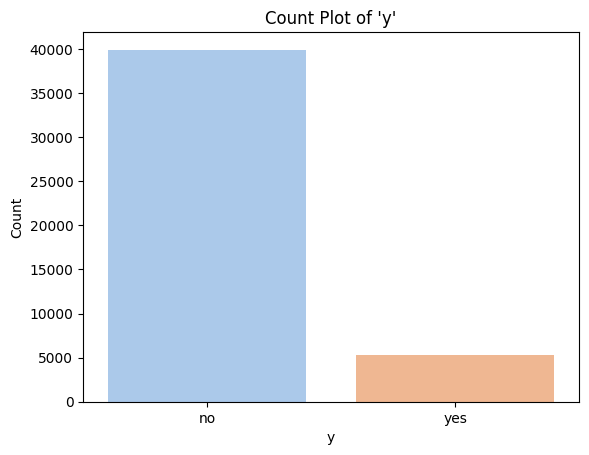

In [16]:
# visualize target variable distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="y", data=df, palette="pastel", hue="y", legend=False)
plt.title("Count Plot of 'y'")
plt.xlabel("y")
plt.ylabel("Count")
plt.show()

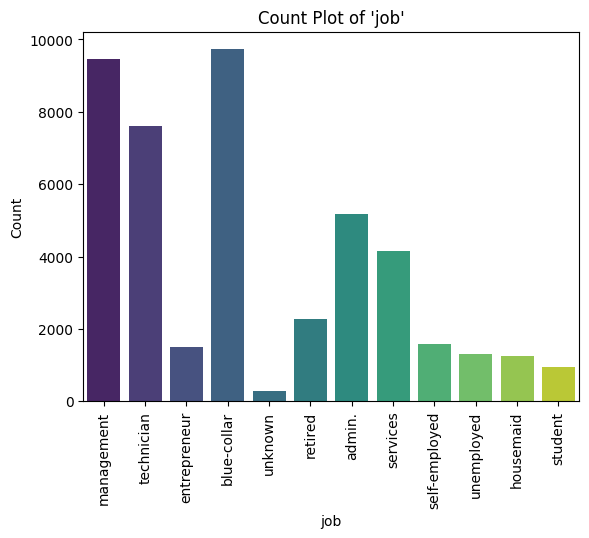

In [23]:
# visualize the job distribution
sns.countplot(x="job", data=df, palette="viridis", hue="job", legend=False)
plt.title("Count Plot of 'job'")
plt.xlabel("job")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

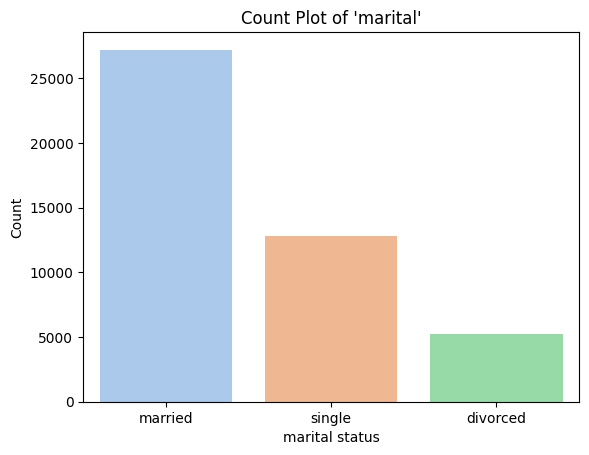

In [20]:
# visualize marital distribution
sns.countplot(x="marital", data=df, palette="pastel", hue="marital", legend=False)
plt.title("Count Plot of 'marital'")
plt.xlabel("marital status")
plt.ylabel("Count")
plt.show()

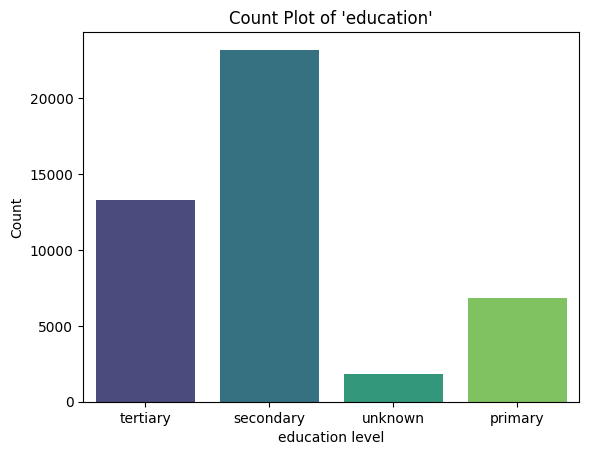

In [22]:
# visualize education distribution
sns.countplot(x="education_qual", data=df, palette="viridis", hue="education_qual", legend=False)
plt.title("Count Plot of 'education'")
plt.xlabel("education level")
plt.ylabel("Count")
plt.show()

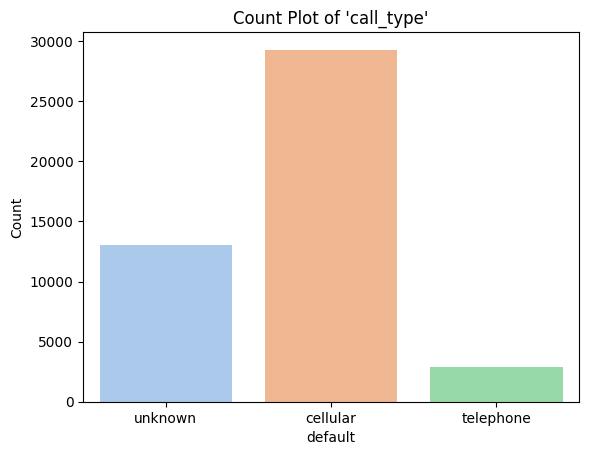

In [24]:
# visualize call type distribution
sns.countplot(x="call_type", data=df, palette="pastel", hue="call_type", legend=False)
plt.title("Count Plot of 'call_type'")
plt.xlabel("default")
plt.ylabel("Count")
plt.show()

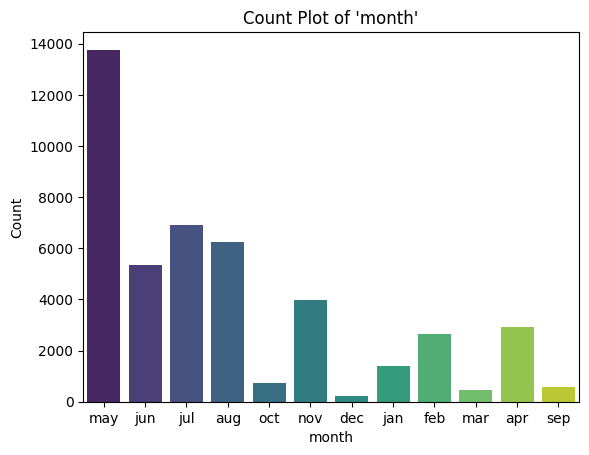

In [26]:
# visualize month distribution
sns.countplot(x="mon", data=df, palette="viridis", hue="mon", legend=False)
plt.title("Count Plot of 'month'")
plt.xlabel("month")
plt.ylabel("Count")
plt.show()

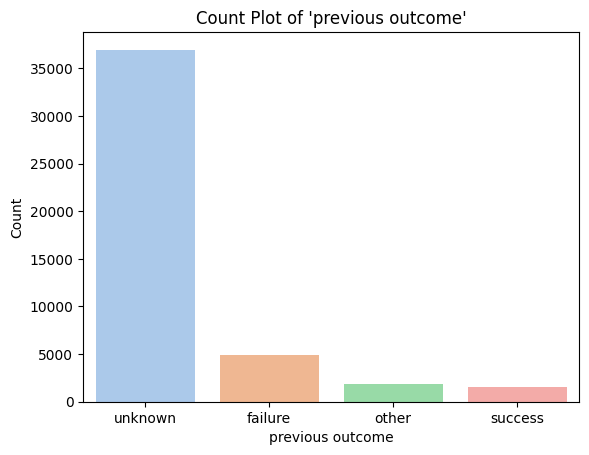

In [27]:
# visualize previous outcome distribution
sns.countplot(x="prev_outcome", data=df, palette="pastel", hue="prev_outcome", legend=False)
plt.title("Count Plot of 'previous outcome'")
plt.xlabel("previous outcome")
plt.ylabel("Count")
plt.show()

In [32]:
# encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome','y']
# loop through categorical_columns and encode each column
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,4,1,2,2,5,8,261,1,3,0
1,44,9,2,1,2,5,8,151,1,3,0
2,33,2,1,1,2,5,8,76,1,3,0
3,47,1,1,3,2,5,8,92,1,3,0
4,33,11,2,3,2,5,8,198,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,17,9,977,3,3,1
45207,71,5,0,0,0,17,9,456,2,3,1
45208,72,5,1,1,0,17,9,1127,5,2,1
45209,57,1,1,1,1,17,9,508,4,3,0


In [43]:
# address class imbalance in target using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X = df.drop('y', axis=1)
y = df['y']
X_res, y_res = smote.fit_resample(X, y)

# shape of X_res
print("Shape of X_res:", X_res.shape)
# shape of y_res
print("Shape of y_res:", y_res.shape)
# value count of y_res
print("Value count of y_res:", y_res.value_counts())


Shape of X_res: (79832, 10)
Shape of y_res: (79832,)
Value count of y_res: y
0    39916
1    39916
Name: count, dtype: int64


In [41]:
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
# shape of X_scaled
print("Shape of X_scaled:", X_scaled.shape)

Shape of X_scaled: (79832, 10)


In [49]:
# splitting the dataset for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)
# shape of y_train
print("Shape of y_train:", y_train.shape)

Shape of y_train: (63865,)


In [54]:
# train and evaluate using the naive bayes model
# import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
# define the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
# predict
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy *100)
print("Precision:", precision *100)
print("Recall:", recall *100)
print("F1 Score:", f1 * 100)


Accuracy: 73.25108035322853
Precision: 66.9651098393945
Recall: 91.29231156411224
F1 Score: 77.25893189925989


In [55]:
# train and evaluate using the Linear Discriminant Analysis (LDA) Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy *100)
print("Precision:", precision *100)
print("Recall:", recall *100)
print("F1 Score:", f1 * 100)

Accuracy: 78.14868165591533
Precision: 76.88133140376266
Recall: 80.21895054737637
F1 Score: 78.51468686495474


In [56]:
# train and evaluate with the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy *100)
print("Precision:", precision *100)
print("Recall:", recall *100)
print("F1 Score:", f1 * 100)

Accuracy: 90.3926849126323
Precision: 89.26166278927391
Recall: 91.73272933182332
F1 Score: 90.48032766538414


In [57]:
# train and evaluate with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy *100)
print("Precision:", precision *100)
print("Recall:", recall *100)
print("F1 Score:", f1 * 100)

Accuracy: 93.27362685538924
Precision: 91.74055629782583
Recall: 95.04215427205234
F1 Score: 93.36217552533994


In [58]:
# train and evaluate with a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy *100)
print("Precision:", precision *100)
print("Recall:", recall *100)
print("F1 Score:", f1 * 100)

Accuracy: 93.3487818625916
Precision: 91.4609177405757
Recall: 95.55807222851391
F1 Score: 93.46461538461539


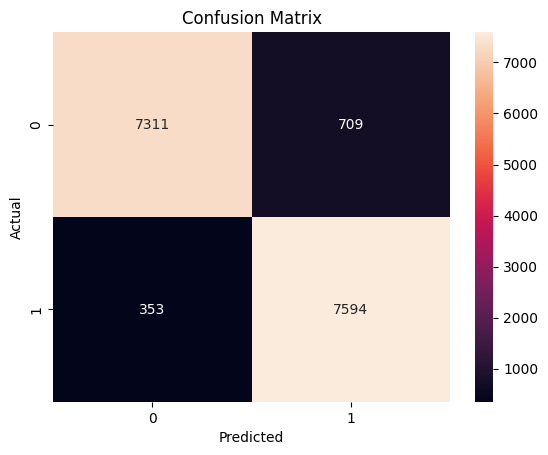

In [62]:
# visualize a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# visualize confusion matrix using heatmap
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
